In [137]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from google.colab import files

In [131]:
df = pd.read_csv("summary.csv")
df.head(5)

,date,route_id,total_trips,early_am_trips,peak_am_trips,midday_trips,peak_pm_trips,evening_pm_trips,late_pm_trips,local_trips,express_trips,typical_trips,atypical_trips
0,10/3/2019,CR-Franklin,40,3,8,11,9,5,4,1,39,40,0
1,10/3/2019,CR-Worcester,54,5,14,10,12,9,4,15,39,54,0
2,10/3/2019,CR-Providence,71,5,17,17,16,9,7,4,67,71,0
3,10/3/2019,CR-Fitchburg,38,1,9,12,8,5,3,4,34,38,0
4,10/3/2019,CR-Newburyport,67,3,16,18,15,9,6,67,0,67,0


In [132]:
df.drop(["typical_trips", "atypical_trips"], axis = 1, inplace = True)

In [133]:
df["route_id"].unique()

array(['CR-Franklin', 'CR-Worcester', 'CR-Providence', 'CR-Fitchburg',
       'CR-Newburyport', 'CR-Haverhill', 'CR-Middleborough',
       'CR-Kingston', 'CR-Lowell', 'CR-Greenbush', 'CR-Needham',
       'CR-Fairmount', 'CR-Foxboro'], dtype=object)

In [134]:
dfFranklin = df[df["route_id"] == "CR-Franklin"]
dfFranklin['date'] = pd.to_datetime(dfFranklin['date'])
dfFranklin['day_type'] = dfFranklin['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
df_Franklin_weekday = dfFranklin[dfFranklin['day_type'] == 'Weekday']
df_Franklin_weekend = dfFranklin[dfFranklin['day_type'] == 'Weekend']

<ipython-input-134-60e0ee16e193>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFranklin['date'] = pd.to_datetime(dfFranklin['date'])
<ipython-input-134-60e0ee16e193>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFranklin['day_type'] = dfFranklin['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')


In [135]:
df_Franklin_weekday['year'] = pd.to_datetime(df_Franklin_weekday['date']).dt.year
df_Franklin_weekday['month'] = pd.to_datetime(df_Franklin_weekday['date']).dt.month
df_Franklin_weekday['day'] = pd.to_datetime(df_Franklin_weekday['date']).dt.day

df_Franklin_weekday = df_Franklin_weekday.drop_duplicates(subset=['year', 'month'])

df_Franklin_weekend['year'] = pd.to_datetime(df_Franklin_weekend['date']).dt.year
df_Franklin_weekend['month'] = pd.to_datetime(df_Franklin_weekend['date']).dt.month
df_Franklin_weekend['day'] = pd.to_datetime(df_Franklin_weekend['date']).dt.day

df_Franklin_weekend = df_Franklin_weekend.drop_duplicates(subset=['year', 'month'])



<ipython-input-135-b4433bf4ec90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Franklin_weekday['year'] = pd.to_datetime(df_Franklin_weekday['date']).dt.year
<ipython-input-135-b4433bf4ec90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Franklin_weekday['month'] = pd.to_datetime(df_Franklin_weekday['date']).dt.month
<ipython-input-135-b4433bf4ec90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

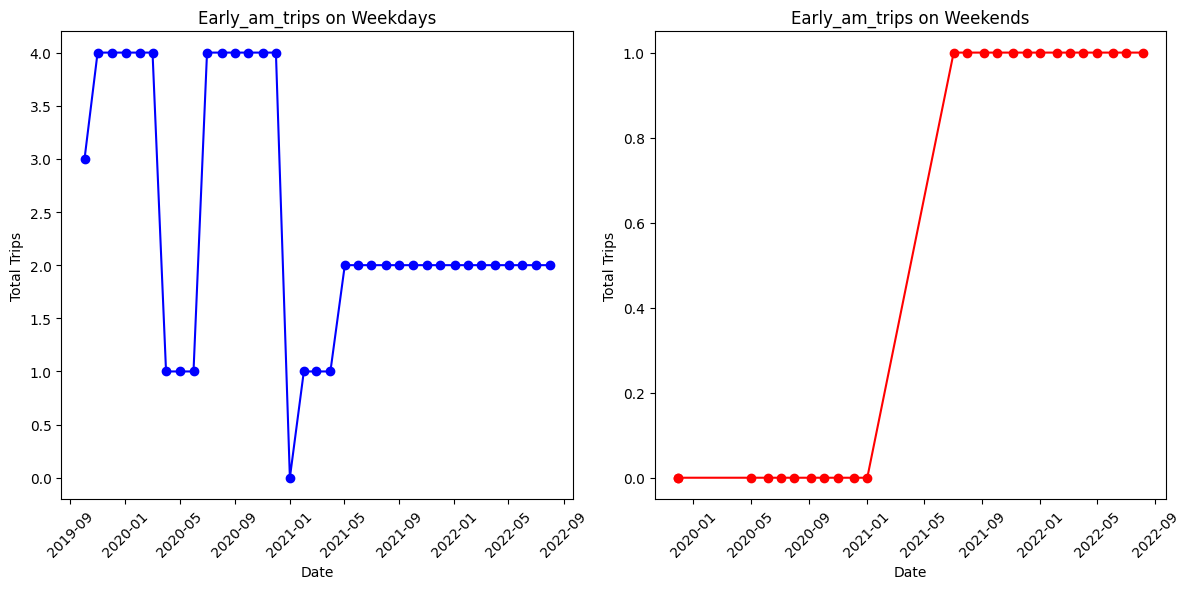

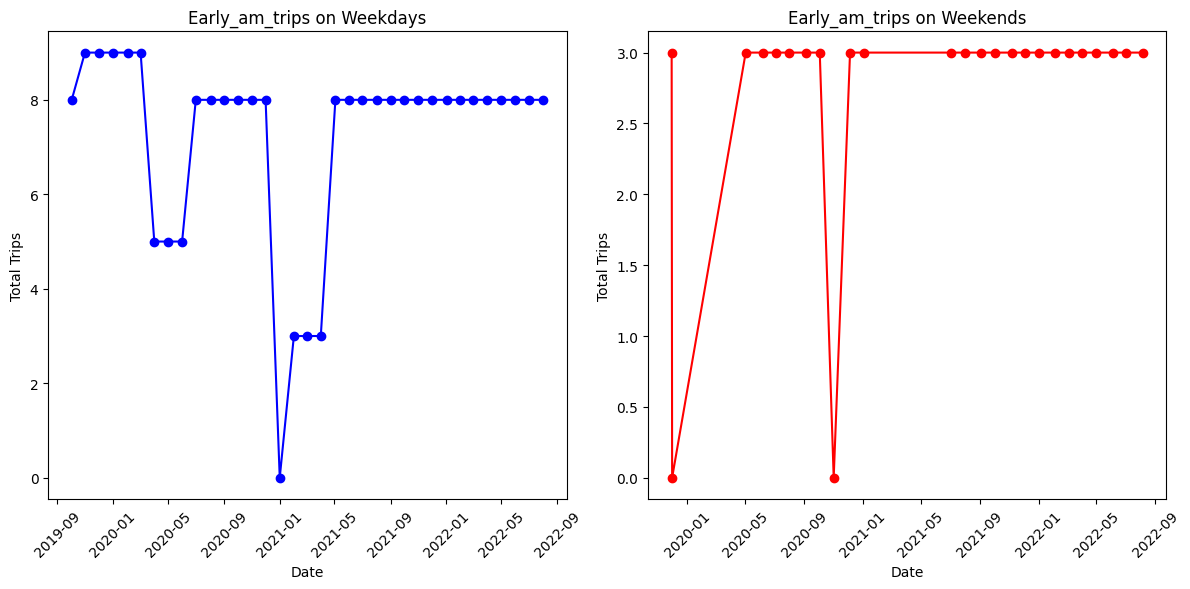

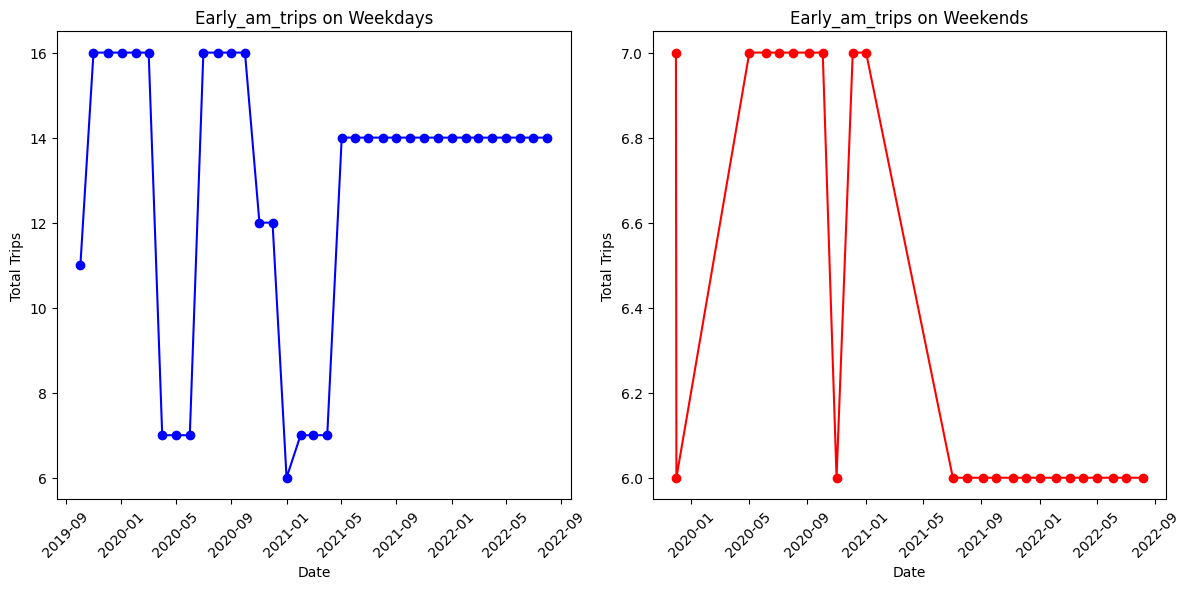

In [136]:
plt.figure(figsize=(12, 6))

# Plot for weekdays
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(df_Franklin_weekday['date'], df_Franklin_weekday['early_am_trips'], marker='o', linestyle='-', color='blue')
plt.title('Early_am_trips on Weekdays')
plt.xlabel('Date')
plt.ylabel('Total Trips')
plt.xticks(rotation=45)
plt.tight_layout()

# Plot for weekends
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(df_Franklin_weekend['date'], df_Franklin_weekend['early_am_trips'], marker='o', linestyle='-', color='red')
plt.title('Early_am_trips on Weekends')
plt.xlabel('Date')
plt.ylabel('Total Trips')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


plt.figure(figsize=(12, 6))

# Plot for weekdays
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(df_Franklin_weekday['date'], df_Franklin_weekday['peak_am_trips'], marker='o', linestyle='-', color='blue')
plt.title('Early_am_trips on Weekdays')
plt.xlabel('Date')
plt.ylabel('Total Trips')
plt.xticks(rotation=45)
plt.tight_layout()

# Plot for weekends
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(df_Franklin_weekend['date'], df_Franklin_weekend['peak_am_trips'], marker='o', linestyle='-', color='red')
plt.title('Early_am_trips on Weekends')
plt.xlabel('Date')
plt.ylabel('Total Trips')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

plt.figure(figsize=(12, 6))

# Plot for weekdays
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(df_Franklin_weekday['date'], df_Franklin_weekday['midday_trips'], marker='o', linestyle='-', color='blue')
plt.title('Early_am_trips on Weekdays')
plt.xlabel('Date')
plt.ylabel('Total Trips')
plt.xticks(rotation=45)
plt.tight_layout()

# Plot for weekends
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(df_Franklin_weekend['date'], df_Franklin_weekend['midday_trips'], marker='o', linestyle='-', color='red')
plt.title('Early_am_trips on Weekends')
plt.xlabel('Date')
plt.ylabel('Total Trips')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [138]:
csv_file_path = 'Franklin_weekend.csv'
df_Franklin_weekend.to_csv(csv_file_path, index=False)
files.download(csv_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [139]:
csv_file_path = 'Franklin_weekday.csv'
df_Franklin_weekday.to_csv(csv_file_path, index=False)
files.download(csv_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [142]:
dfWorcester = df[df["route_id"] == "CR-Worcester"]
dfWorcester['date'] = pd.to_datetime(dfWorcester['date'])
dfWorcester['day_type'] = dfWorcester['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
df_Worcester_weekday = dfWorcester[dfWorcester['day_type'] == 'Weekday']
df_Worcester_weekend = dfWorcester[dfWorcester['day_type'] == 'Weekend']

<ipython-input-142-af88b6907fd8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWorcester['date'] = pd.to_datetime(dfWorcester['date'])
<ipython-input-142-af88b6907fd8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWorcester['day_type'] = dfWorcester['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')


In [143]:
df_Worcester_weekday['year'] = pd.to_datetime(df_Worcester_weekday['date']).dt.year
df_Worcester_weekday['month'] = pd.to_datetime(df_Worcester_weekday['date']).dt.month
df_Worcester_weekday['day'] = pd.to_datetime(df_Worcester_weekday['date']).dt.day

df_Worcester_weekday = df_Worcester_weekday.drop_duplicates(subset=['year', 'month'])

df_Worcester_weekend['year'] = pd.to_datetime(df_Worcester_weekend['date']).dt.year
df_Worcester_weekend['month'] = pd.to_datetime(df_Worcester_weekend['date']).dt.month
df_Worcester_weekend['day'] = pd.to_datetime(df_Worcester_weekend['date']).dt.day

df_Worcester_weekend = df_Worcester_weekend.drop_duplicates(subset=['year', 'month'])



<ipython-input-143-4f7cd7bda693>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Worcester_weekday['year'] = pd.to_datetime(df_Worcester_weekday['date']).dt.year
<ipython-input-143-4f7cd7bda693>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Worcester_weekday['month'] = pd.to_datetime(df_Worcester_weekday['date']).dt.month
<ipython-input-143-4f7cd7bda693>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [144]:
csv_file_path = 'Worcester_weekend.csv'
df_Worcester_weekend.to_csv(csv_file_path, index=False)
files.download(csv_file_path)

csv_file_path = 'Worcester_weekday.csv'
df_Worcester_weekday.to_csv(csv_file_path, index=False)
files.download(csv_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [145]:
dfProvidence = df[df["route_id"] == "CR-Providence"]
dfProvidence['date'] = pd.to_datetime(dfProvidence['date'])
dfProvidence['day_type'] = dfProvidence['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
df_Providence_weekday = dfProvidence[dfProvidence['day_type'] == 'Weekday']
df_Providence_weekend = dfProvidence[dfProvidence['day_type'] == 'Weekend']



df_Providence_weekday['year'] = pd.to_datetime(df_Providence_weekday['date']).dt.year
df_Providence_weekday['month'] = pd.to_datetime(df_Providence_weekday['date']).dt.month
df_Providence_weekday['day'] = pd.to_datetime(df_Providence_weekday['date']).dt.day

df_Providence_weekday = df_Providence_weekday.drop_duplicates(subset=['year', 'month'])

df_Providence_weekend['year'] = pd.to_datetime(df_Providence_weekend['date']).dt.year
df_Providence_weekend['month'] = pd.to_datetime(df_Providence_weekend['date']).dt.month
df_Providence_weekend['day'] = pd.to_datetime(df_Providence_weekend['date']).dt.day

df_Providence_weekend = df_Providence_weekend.drop_duplicates(subset=['year', 'month'])



csv_file_path = 'Providence_weekend.csv'
df_Providence_weekend.to_csv(csv_file_path, index=False)
files.download(csv_file_path)

csv_file_path = 'Providence_weekday.csv'
df_Providence_weekday.to_csv(csv_file_path, index=False)
files.download(csv_file_path)



<ipython-input-145-5463c069c1f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfProvidence['date'] = pd.to_datetime(dfProvidence['date'])
<ipython-input-145-5463c069c1f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfProvidence['day_type'] = dfProvidence['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
<ipython-input-145-5463c069c1f4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [146]:
dfFitchburg = df[df["route_id"] == "CR-Fitchburg"]
dfFitchburg['date'] = pd.to_datetime(dfFitchburg['date'])
dfFitchburg['day_type'] = dfFitchburg['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
df_Fitchburg_weekday = dfFitchburg[dfFitchburg['day_type'] == 'Weekday']
df_Fitchburg_weekend = dfFitchburg[dfFitchburg['day_type'] == 'Weekend']



df_Fitchburg_weekday['year'] = pd.to_datetime(df_Fitchburg_weekday['date']).dt.year
df_Fitchburg_weekday['month'] = pd.to_datetime(df_Fitchburg_weekday['date']).dt.month
df_Fitchburg_weekday['day'] = pd.to_datetime(df_Fitchburg_weekday['date']).dt.day

df_Fitchburg_weekday = df_Fitchburg_weekday.drop_duplicates(subset=['year', 'month'])

df_Fitchburg_weekend['year'] = pd.to_datetime(df_Fitchburg_weekend['date']).dt.year
df_Fitchburg_weekend['month'] = pd.to_datetime(df_Fitchburg_weekend['date']).dt.month
df_Fitchburg_weekend['day'] = pd.to_datetime(df_Fitchburg_weekend['date']).dt.day

df_Fitchburg_weekend = df_Fitchburg_weekend.drop_duplicates(subset=['year', 'month'])



csv_file_path = 'Fitchburg_weekend.csv'
df_Fitchburg_weekend.to_csv(csv_file_path, index=False)
files.download(csv_file_path)

csv_file_path = 'Fitchburg_weekday.csv'
df_Fitchburg_weekday.to_csv(csv_file_path, index=False)
files.download(csv_file_path)



<ipython-input-146-0f9a82909f9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFitchburg['date'] = pd.to_datetime(dfFitchburg['date'])
<ipython-input-146-0f9a82909f9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFitchburg['day_type'] = dfFitchburg['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
<ipython-input-146-0f9a82909f9c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [148]:
dfHaverhill = df[df["route_id"] == "CR-Haverhill"]
dfHaverhill['date'] = pd.to_datetime(dfHaverhill['date'])
dfHaverhill['day_type'] = dfHaverhill['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
df_Haverhill_weekday = dfHaverhill[dfHaverhill['day_type'] == 'Weekday']
df_Haverhill_weekend = dfHaverhill[dfHaverhill['day_type'] == 'Weekend']



df_Haverhill_weekday['year'] = pd.to_datetime(df_Haverhill_weekday['date']).dt.year
df_Haverhill_weekday['month'] = pd.to_datetime(df_Haverhill_weekday['date']).dt.month
df_Haverhill_weekday['day'] = pd.to_datetime(df_Haverhill_weekday['date']).dt.day

df_Haverhill_weekday = df_Haverhill_weekday.drop_duplicates(subset=['year', 'month'])

df_Haverhill_weekend['year'] = pd.to_datetime(df_Haverhill_weekend['date']).dt.year
df_Haverhill_weekend['month'] = pd.to_datetime(df_Haverhill_weekend['date']).dt.month
df_Haverhill_weekend['day'] = pd.to_datetime(df_Haverhill_weekend['date']).dt.day

df_Haverhill_weekend = df_Haverhill_weekend.drop_duplicates(subset=['year', 'month'])



csv_file_path = 'Haverhill_weekend.csv'
df_Haverhill_weekend.to_csv(csv_file_path, index=False)
files.download(csv_file_path)

csv_file_path = 'Haverhill_weekday.csv'
df_Haverhill_weekday.to_csv(csv_file_path, index=False)
files.download(csv_file_path)



<ipython-input-148-bc64a5eee54f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfHaverhill['date'] = pd.to_datetime(dfHaverhill['date'])
<ipython-input-148-bc64a5eee54f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfHaverhill['day_type'] = dfHaverhill['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
<ipython-input-148-bc64a5eee54f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [149]:
dfMiddleborough = df[df["route_id"] == "CR-Middleborough"]
dfMiddleborough['date'] = pd.to_datetime(dfMiddleborough['date'])
dfMiddleborough['day_type'] = dfMiddleborough['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
df_Middleborough_weekday = dfMiddleborough[dfMiddleborough['day_type'] == 'Weekday']
df_Middleborough_weekend = dfMiddleborough[dfMiddleborough['day_type'] == 'Weekend']



df_Middleborough_weekday['year'] = pd.to_datetime(df_Middleborough_weekday['date']).dt.year
df_Middleborough_weekday['month'] = pd.to_datetime(df_Middleborough_weekday['date']).dt.month
df_Middleborough_weekday['day'] = pd.to_datetime(df_Middleborough_weekday['date']).dt.day

df_Middleborough_weekday = df_Middleborough_weekday.drop_duplicates(subset=['year', 'month'])

df_Middleborough_weekend['year'] = pd.to_datetime(df_Middleborough_weekend['date']).dt.year
df_Middleborough_weekend['month'] = pd.to_datetime(df_Middleborough_weekend['date']).dt.month
df_Middleborough_weekend['day'] = pd.to_datetime(df_Middleborough_weekend['date']).dt.day

df_Middleborough_weekend = df_Middleborough_weekend.drop_duplicates(subset=['year', 'month'])



csv_file_path = 'Middleborough_weekend.csv'
df_Middleborough_weekend.to_csv(csv_file_path, index=False)
files.download(csv_file_path)

csv_file_path = 'Middleborough_weekday.csv'
df_Middleborough_weekday.to_csv(csv_file_path, index=False)
files.download(csv_file_path)



<ipython-input-149-312a9b478a33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMiddleborough['date'] = pd.to_datetime(dfMiddleborough['date'])
<ipython-input-149-312a9b478a33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMiddleborough['day_type'] = dfMiddleborough['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
<ipython-input-149-312a9b478a33>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [150]:
dfKingston = df[df["route_id"] == "CR-Kingston"]
dfKingston['date'] = pd.to_datetime(dfKingston['date'])
dfKingston['day_type'] = dfKingston['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
df_Kingston_weekday = dfKingston[dfKingston['day_type'] == 'Weekday']
df_Kingston_weekend = dfKingston[dfKingston['day_type'] == 'Weekend']



df_Kingston_weekday['year'] = pd.to_datetime(df_Kingston_weekday['date']).dt.year
df_Kingston_weekday['month'] = pd.to_datetime(df_Kingston_weekday['date']).dt.month
df_Kingston_weekday['day'] = pd.to_datetime(df_Kingston_weekday['date']).dt.day

df_Kingston_weekday = df_Kingston_weekday.drop_duplicates(subset=['year', 'month'])

df_Kingston_weekend['year'] = pd.to_datetime(df_Kingston_weekend['date']).dt.year
df_Kingston_weekend['month'] = pd.to_datetime(df_Kingston_weekend['date']).dt.month
df_Kingston_weekend['day'] = pd.to_datetime(df_Kingston_weekend['date']).dt.day

df_Kingston_weekend = df_Kingston_weekend.drop_duplicates(subset=['year', 'month'])



csv_file_path = 'Kingston_weekend.csv'
df_Kingston_weekend.to_csv(csv_file_path, index=False)
files.download(csv_file_path)

csv_file_path = 'Kingston_weekday.csv'
df_Kingston_weekday.to_csv(csv_file_path, index=False)
files.download(csv_file_path)



<ipython-input-150-da8d1fd0db79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfKingston['date'] = pd.to_datetime(dfKingston['date'])
<ipython-input-150-da8d1fd0db79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfKingston['day_type'] = dfKingston['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
<ipython-input-150-da8d1fd0db79>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [151]:
dfLowell = df[df["route_id"] == "CR-Lowell"]
dfLowell['date'] = pd.to_datetime(dfLowell['date'])
dfLowell['day_type'] = dfLowell['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
df_Lowell_weekday = dfLowell[dfLowell['day_type'] == 'Weekday']
df_Lowell_weekend = dfLowell[dfLowell['day_type'] == 'Weekend']



df_Lowell_weekday['year'] = pd.to_datetime(df_Lowell_weekday['date']).dt.year
df_Lowell_weekday['month'] = pd.to_datetime(df_Lowell_weekday['date']).dt.month
df_Lowell_weekday['day'] = pd.to_datetime(df_Lowell_weekday['date']).dt.day

df_Lowell_weekday = df_Lowell_weekday.drop_duplicates(subset=['year', 'month'])

df_Lowell_weekend['year'] = pd.to_datetime(df_Lowell_weekend['date']).dt.year
df_Lowell_weekend['month'] = pd.to_datetime(df_Lowell_weekend['date']).dt.month
df_Lowell_weekend['day'] = pd.to_datetime(df_Lowell_weekend['date']).dt.day

df_Lowell_weekend = df_Lowell_weekend.drop_duplicates(subset=['year', 'month'])



csv_file_path = 'Lowell_weekend.csv'
df_Lowell_weekend.to_csv(csv_file_path, index=False)
files.download(csv_file_path)

csv_file_path = 'Lowell_weekday.csv'
df_Lowell_weekday.to_csv(csv_file_path, index=False)
files.download(csv_file_path)



<ipython-input-151-8dfef1986b84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfLowell['date'] = pd.to_datetime(dfLowell['date'])
<ipython-input-151-8dfef1986b84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfLowell['day_type'] = dfLowell['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
<ipython-input-151-8dfef1986b84>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [152]:
dfGreenbush = df[df["route_id"] == "CR-Greenbush"]
dfGreenbush['date'] = pd.to_datetime(dfGreenbush['date'])
dfGreenbush['day_type'] = dfGreenbush['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
df_Greenbush_weekday = dfGreenbush[dfGreenbush['day_type'] == 'Weekday']
df_Greenbush_weekend = dfGreenbush[dfGreenbush['day_type'] == 'Weekend']



df_Greenbush_weekday['year'] = pd.to_datetime(df_Greenbush_weekday['date']).dt.year
df_Greenbush_weekday['month'] = pd.to_datetime(df_Greenbush_weekday['date']).dt.month
df_Greenbush_weekday['day'] = pd.to_datetime(df_Greenbush_weekday['date']).dt.day

df_Greenbush_weekday = df_Greenbush_weekday.drop_duplicates(subset=['year', 'month'])

df_Greenbush_weekend['year'] = pd.to_datetime(df_Greenbush_weekend['date']).dt.year
df_Greenbush_weekend['month'] = pd.to_datetime(df_Greenbush_weekend['date']).dt.month
df_Greenbush_weekend['day'] = pd.to_datetime(df_Greenbush_weekend['date']).dt.day

df_Greenbush_weekend = df_Greenbush_weekend.drop_duplicates(subset=['year', 'month'])



csv_file_path = 'Greenbush_weekend.csv'
df_Greenbush_weekend.to_csv(csv_file_path, index=False)
files.download(csv_file_path)

csv_file_path = 'Greenbush_weekday.csv'
df_Greenbush_weekday.to_csv(csv_file_path, index=False)
files.download(csv_file_path)



<ipython-input-152-b38e5fc774ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGreenbush['date'] = pd.to_datetime(dfGreenbush['date'])
<ipython-input-152-b38e5fc774ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGreenbush['day_type'] = dfGreenbush['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
<ipython-input-152-b38e5fc774ad>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [153]:
dfNeedham = df[df["route_id"] == "CR-Needham"]
dfNeedham['date'] = pd.to_datetime(dfNeedham['date'])
dfNeedham['day_type'] = dfNeedham['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
df_Needham_weekday = dfNeedham[dfNeedham['day_type'] == 'Weekday']
df_Needham_weekend = dfNeedham[dfNeedham['day_type'] == 'Weekend']



df_Needham_weekday['year'] = pd.to_datetime(df_Needham_weekday['date']).dt.year
df_Needham_weekday['month'] = pd.to_datetime(df_Needham_weekday['date']).dt.month
df_Needham_weekday['day'] = pd.to_datetime(df_Needham_weekday['date']).dt.day

df_Needham_weekday = df_Needham_weekday.drop_duplicates(subset=['year', 'month'])

df_Needham_weekend['year'] = pd.to_datetime(df_Needham_weekend['date']).dt.year
df_Needham_weekend['month'] = pd.to_datetime(df_Needham_weekend['date']).dt.month
df_Needham_weekend['day'] = pd.to_datetime(df_Needham_weekend['date']).dt.day

df_Needham_weekend = df_Needham_weekend.drop_duplicates(subset=['year', 'month'])



csv_file_path = 'Needham_weekend.csv'
df_Needham_weekend.to_csv(csv_file_path, index=False)
files.download(csv_file_path)

csv_file_path = 'Needham_weekday.csv'
df_Needham_weekday.to_csv(csv_file_path, index=False)
files.download(csv_file_path)



<ipython-input-153-7f71aacf93ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNeedham['date'] = pd.to_datetime(dfNeedham['date'])
<ipython-input-153-7f71aacf93ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNeedham['day_type'] = dfNeedham['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
<ipython-input-153-7f71aacf93ae>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [154]:
dfFairmount = df[df["route_id"] == "CR-Fairmount"]
dfFairmount['date'] = pd.to_datetime(dfFairmount['date'])
dfFairmount['day_type'] = dfFairmount['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
df_Fairmount_weekday = dfFairmount[dfFairmount['day_type'] == 'Weekday']
df_Fairmount_weekend = dfFairmount[dfFairmount['day_type'] == 'Weekend']



df_Fairmount_weekday['year'] = pd.to_datetime(df_Fairmount_weekday['date']).dt.year
df_Fairmount_weekday['month'] = pd.to_datetime(df_Fairmount_weekday['date']).dt.month
df_Fairmount_weekday['day'] = pd.to_datetime(df_Fairmount_weekday['date']).dt.day

df_Fairmount_weekday = df_Fairmount_weekday.drop_duplicates(subset=['year', 'month'])

df_Fairmount_weekend['year'] = pd.to_datetime(df_Fairmount_weekend['date']).dt.year
df_Fairmount_weekend['month'] = pd.to_datetime(df_Fairmount_weekend['date']).dt.month
df_Fairmount_weekend['day'] = pd.to_datetime(df_Fairmount_weekend['date']).dt.day

df_Fairmount_weekend = df_Fairmount_weekend.drop_duplicates(subset=['year', 'month'])



csv_file_path = 'Fairmount_weekend.csv'
df_Fairmount_weekend.to_csv(csv_file_path, index=False)
files.download(csv_file_path)

csv_file_path = 'Fairmount_weekday.csv'
df_Fairmount_weekday.to_csv(csv_file_path, index=False)
files.download(csv_file_path)



<ipython-input-154-f3b2acb1eda0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFairmount['date'] = pd.to_datetime(dfFairmount['date'])
<ipython-input-154-f3b2acb1eda0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFairmount['day_type'] = dfFairmount['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
<ipython-input-154-f3b2acb1eda0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [155]:
dfFoxboro = df[df["route_id"] == "CR-Foxboro"]
dfFoxboro['date'] = pd.to_datetime(dfFoxboro['date'])
dfFoxboro['day_type'] = dfFoxboro['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
df_Foxboro_weekday = dfFoxboro[dfFoxboro['day_type'] == 'Weekday']
df_Foxboro_weekend = dfFoxboro[dfFoxboro['day_type'] == 'Weekend']



df_Foxboro_weekday['year'] = pd.to_datetime(df_Foxboro_weekday['date']).dt.year
df_Foxboro_weekday['month'] = pd.to_datetime(df_Foxboro_weekday['date']).dt.month
df_Foxboro_weekday['day'] = pd.to_datetime(df_Foxboro_weekday['date']).dt.day

df_Foxboro_weekday = df_Foxboro_weekday.drop_duplicates(subset=['year', 'month'])

df_Foxboro_weekend['year'] = pd.to_datetime(df_Foxboro_weekend['date']).dt.year
df_Foxboro_weekend['month'] = pd.to_datetime(df_Foxboro_weekend['date']).dt.month
df_Foxboro_weekend['day'] = pd.to_datetime(df_Foxboro_weekend['date']).dt.day

df_Foxboro_weekend = df_Foxboro_weekend.drop_duplicates(subset=['year', 'month'])



csv_file_path = 'Foxboro_weekend.csv'
df_Foxboro_weekend.to_csv(csv_file_path, index=False)
files.download(csv_file_path)

csv_file_path = 'Foxboro_weekday.csv'
df_Foxboro_weekday.to_csv(csv_file_path, index=False)
files.download(csv_file_path)



<ipython-input-155-a2cb7ca9fdf9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFoxboro['date'] = pd.to_datetime(dfFoxboro['date'])
<ipython-input-155-a2cb7ca9fdf9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFoxboro['day_type'] = dfFoxboro['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
<ipython-input-155-a2cb7ca9fdf9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>